In [1]:
import pandas
pandas.__version__

'0.23.4'

In [2]:
df = pandas.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv", 
                     skiprows=[1035],
                     skipinitialspace=True)

The "skipinitialspace" was needed in order to deal with the column headers.

In [3]:
df.columns.tolist()

['Name', 'Team', 'Position', 'Height(inches)', 'Weight(lbs)', 'Age']

In [4]:
rows, cols = df.shape

print ("Number of rows: ", rows)
print ("Number Of columns: ", cols)

Number of rows:  1034
Number Of columns:  6


In [5]:
df.head()

,Name,Team,Position,Height(inches),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180.0,22.99
1,Paul Bako,BAL,Catcher,74,215.0,34.69
2,Ramon Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin Millar,BAL,First Baseman,72,210.0,35.43
4,Chris Gomez,BAL,First Baseman,73,188.0,35.71


In [6]:
df.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(lbs)       float64
Age               float64
dtype: object

### distribution of columns with numerical values:

In [42]:
df.describe()

,Height(inches),Weight(lbs),Age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


### inspect uniqueness per column

In [41]:
for this_column in df.columns:
    print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
    print(df[this_column].value_counts().head(10))

====  Name has 1032 unique entries ====
Tony Pe?a           2
Chris Young         2
A.J. Murray         1
Eric Bruntlett      1
Sean Green          1
Jake Westbrook      1
Blaine Boyer        1
Trever Miller       1
Chad Billingsley    1
Scott Williamson    1
Name: Name, dtype: int64
====  Team has 30 unique entries ====
NYM    38
ATL    37
DET    37
OAK    37
CIN    36
BOS    36
WAS    36
PHI    36
CHC    36
ANA    35
Name: Team, dtype: int64
====  Position has 9 unique entries ====
Relief Pitcher       315
Starting Pitcher     221
Outfielder           194
Catcher               76
Second Baseman        58
First Baseman         55
Shortstop             52
Third Baseman         45
Designated Hitter     18
Name: Position, dtype: int64
====  Height(inches) has 17 unique entries ====
74    175
73    167
75    160
72    152
76    103
71     89
77     57
70     52
78     27
69     19
Name: Height(inches), dtype: int64
====  Weight(lbs) has 89 unique entries ====
200.0    108
190.0     97
180

## Measure correlation of numeric columns

[Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is 
 - +1 in the case of a perfect direct (increasing) linear relationship (correlation)
 - −1 in the case of a perfect decreasing (inverse) linear relationship (anticorrelation)
 - zero for uncorrelated

In [7]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


### Visualize the correlation matrix

In [8]:
import matplotlib.pyplot as plt

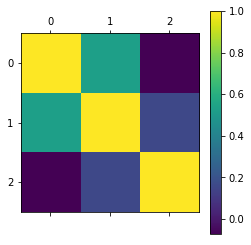

In [9]:
_ = plt.matshow(df.corr())
_ = plt.colorbar()

https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

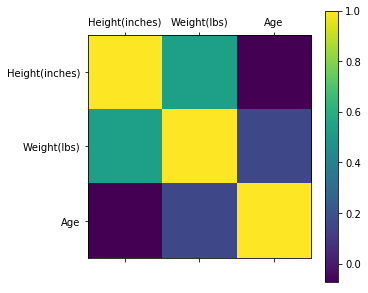

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
p=ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
_ = plt.colorbar(p)

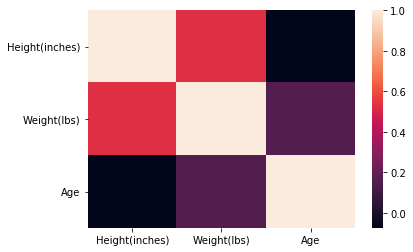

In [11]:
import seaborn as sns
corr = df.corr()
_ = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### What do the scatter plots look like for each pair of columns?

In [12]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


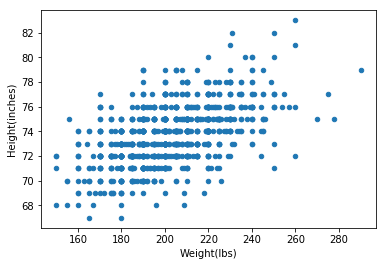

In [13]:
_ = df.plot.scatter(x='Weight(lbs)',y='Height(inches)')

In [14]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


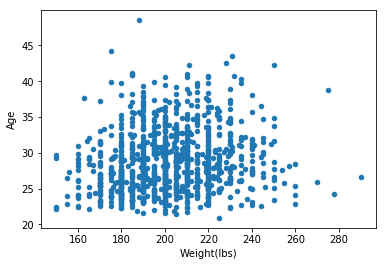

In [15]:
_ = df.plot.scatter(x='Weight(lbs)',y='Age')

In [16]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


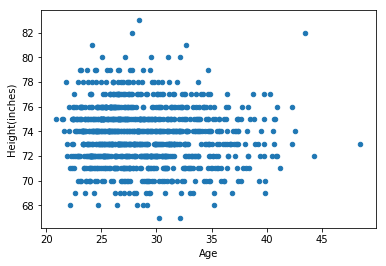

In [17]:
_ = df.plot.scatter(x='Age',y='Height(inches)')

## linear fit for best correlated pair

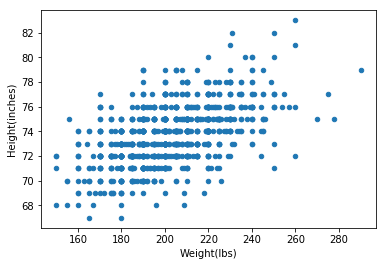

In [18]:
_ = df.plot.scatter(x='Weight(lbs)',y='Height(inches)')

In [19]:
import numpy
numpy.__version__

'1.15.1'

pandas calculates correlation with nan, numpy does not accept nan entries

In [20]:
df_no_nan =df.dropna()
df_no_nan.shape

(1033, 6)

In [21]:
weights = numpy.array(df_no_nan['Weight(lbs)'])
heights = numpy.array(df_no_nan['Height(inches)'])

In [22]:
numpy.corrcoef([weights,heights])

array([[1.        , 0.53188586],
       [0.53188586, 1.        ]])

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [23]:
polynomial_degree=1
coeffs = numpy.polyfit(weights, heights, polynomial_degree)
coeffs # ordered from highest degree to lowest

array([5.84381585e-02, 6.19125865e+01])

https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html

In [24]:
pol = numpy.poly1d(coeffs)
type(pol)

numpy.lib.polynomial.poly1d

This is unrelated to the linear regression -- just a cool way to include the polynomial using [Latex](https://en.wikipedia.org/wiki/LaTeX)

https://stackoverflow.com/questions/39801403/how-to-derive-equation-from-numpys-polyfit

In [25]:
import sympy
x_symbol = sympy.symbols("x")
poly = sum(sympy.S("{:6.2f}".format(v))*x_symbol**i for i, v in enumerate(coeffs[::-1]))
eq_latex = sympy.printing.latex(poly)

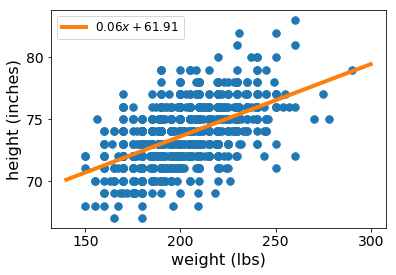

In [26]:
xp = numpy.linspace(140, 300, 30)
_ = plt.plot(weights, heights, '.',markersize=15)
_ = plt.plot(xp, pol(xp), '-', label="${}$".format(eq_latex),linewidth=4)
plt.legend(fontsize="large")
plt.xlabel("weight (lbs)", fontsize=16)
plt.ylabel("height (inches)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

There are [lots of ways](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b) to apply linear regression in Python

In [27]:
from sklearn import linear_model

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [28]:
ols = linear_model.LinearRegression() # ordinary least squares
rslt = ols.fit(weights[:, numpy.newaxis],heights)
print("R^2 = ",ols.score(weights[:, numpy.newaxis],heights))

R^2 =  0.2829025712879796


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [29]:
rslt.coef_[0]

0.05843815853809735

In [30]:
rslt.intercept_

61.91258650472422

In [31]:
x_symbol = sympy.symbols("x")
poly = sum(sympy.S("{:6.2f}".format(v))*x_symbol**i for i, v in enumerate([rslt.intercept_,rslt.coef_[0]]))
eq_latex = sympy.printing.latex(poly)

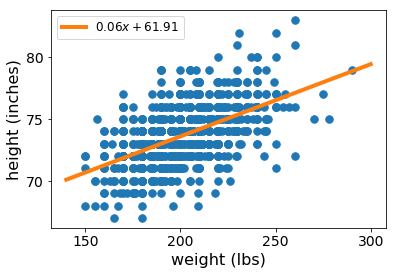

In [32]:
_ = plt.plot(weights, heights, '.',markersize=15)
plt.plot(xp, ols.coef_ * xp + ols.intercept_, label="${}$".format(eq_latex),linewidth=4)
plt.legend(fontsize="large")
plt.xlabel("weight (lbs)", fontsize=16)
plt.ylabel("height (inches)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()